## Objctive:

- Will take bank marketing data set

- Will apply Model developemnt

- Logistic regression

- Decision tree

- Navi bayes

- KNN

- Evaluation techniques

- Hyperparameter tuning

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df=pd.read_csv("D:\\data\\bank.csv",sep=';')

In [7]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1833,37,blue-collar,married,primary,no,0,yes,no,cellular,6,may,226,1,363,3,other,no
872,33,technician,single,secondary,no,716,yes,no,cellular,14,may,234,2,-1,0,unknown,no
3694,44,management,married,secondary,yes,0,yes,no,cellular,11,jul,96,2,-1,0,unknown,no
2359,36,services,single,secondary,no,417,yes,no,cellular,6,feb,15,10,207,3,failure,no
1383,34,management,married,tertiary,no,4170,yes,no,unknown,21,may,935,1,-1,0,unknown,no
1750,47,housemaid,single,tertiary,no,3232,no,no,telephone,6,oct,541,1,204,3,failure,no
4192,29,management,single,secondary,no,584,yes,no,unknown,16,jun,541,19,-1,0,unknown,no
4266,26,services,single,secondary,no,1700,yes,no,cellular,7,may,13,5,-1,0,unknown,no
3818,53,services,divorced,secondary,no,765,yes,no,cellular,14,may,959,3,174,7,other,yes
4221,47,technician,married,unknown,no,2106,yes,no,unknown,6,may,168,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


$step-3$ 
- you need to perfrom EDA 
- you need to understand about the features 
- you need to perfrom feature selection



$step-4$
**convert categorical data to numerical data**
- mapping technique
- get dummies
- label encoder


In [14]:
# will seperate categorical columns first 
cat_col=df.columns[df.dtypes=="O"]
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [16]:
# 


cat=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

$Label encoder$

In [21]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in cat_col:
    df[i]=l.fit_transform(df[i]) 
  # data['job']=fit_transfrom(df["job"])
   # storing value in same column

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


$step-5$

**divide data into input and output data** 


In [25]:
# in our data output column is Y 
# we drop y columns so that we have input data 
# we keep y column for output data
X=df.drop('y',axis=1)
Y=df["y"]

In [26]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3


In [30]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

- Divide data into input(X) and output(y)

- Divide input data into two parts train input data(X_train) and test input data(X_test)

- Divide output data into two parts train output data(y_train) and test output data(y_test)

- Model will develop using train input data(X_train) and train output data(y_train)

- Pass test input data(X_test) to the model

- Then model will give y_predicted data

- Now compare y_predictions with test output data(y_test)

$step=6$ 

- apply train test split 

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=12345)
# random picking bcz if we pick sequentily then data maybe biased 
# first 3 pick then 10 then 17 random =7 

In [35]:
x_train.shape,x_test.shape

((3164, 16), (1357, 16))

In [36]:
y_train.shape,y_test.shape

((3164,), (1357,))

In [37]:
df.head() 
# index is strating from 0123 etc but in split 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [38]:
x_train.head()
# index starting from 956 bcz it is picking up random sample 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
956,27,10,2,1,0,3276,0,0,0,5,1,106,1,110,2,1
2313,51,3,0,2,0,370,1,0,0,19,1,109,3,-1,0,3
1151,44,0,1,1,0,205,0,0,0,3,9,289,1,-1,0,3
967,35,1,1,1,0,6411,1,1,0,30,4,144,1,266,2,0
74,56,5,1,1,0,344,1,0,2,15,8,221,1,-1,0,3


# case-1 : without standardization of data 
# without hyperparameter tunning 

$step:-7$ **model developement**
## 1.Decision Tree    
    

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier() # bydefault criterion='gini'
tree_model

DecisionTreeClassifier()

In [44]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [55]:
tree_model.fit(X=x_train,y=y_train)

DecisionTreeClassifier()

In [48]:
y_dt_pred=tree_model.predict(x_test)
y_dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(y_test.values[:20])
print(y_dt_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


$Step-8$

**Evalution**

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix

In [60]:
# Accuracy score 
acc_score=accuracy_score(y_test,y_dt_pred)
acc_score=round(acc_score,2)*100
print("Accuracy for decision tree",acc_score)

Accuracy for decision tree 86.0


In [61]:
# confussion matrix 
dt_conf=confusion_matrix(y_test,y_dt_pred)
dt_conf

array([[1095,  116],
       [  73,   73]], dtype=int64)

In [64]:
tn,fp,fn,tp=confusion_matrix(y_test,y_dt_pred).ravel()
# actual confussion matrix is different from what we studied 

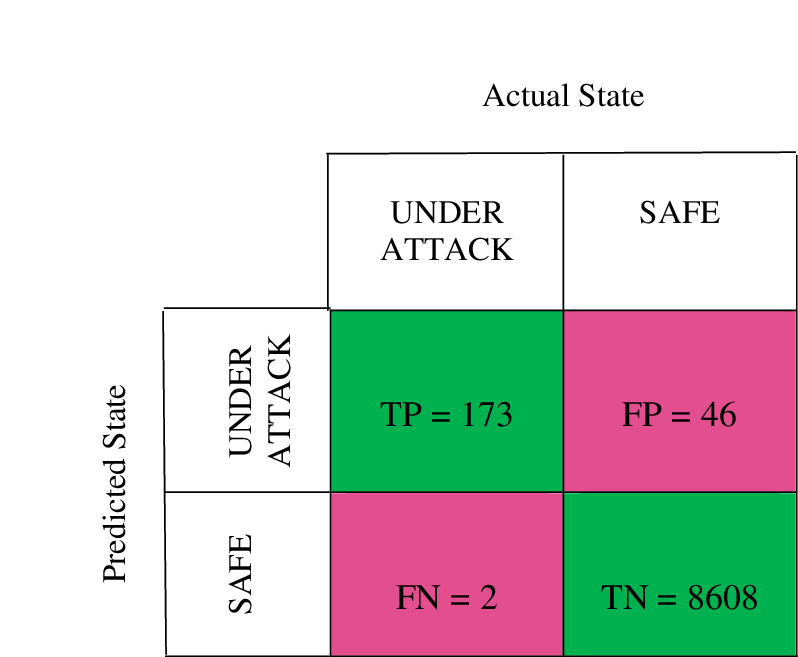

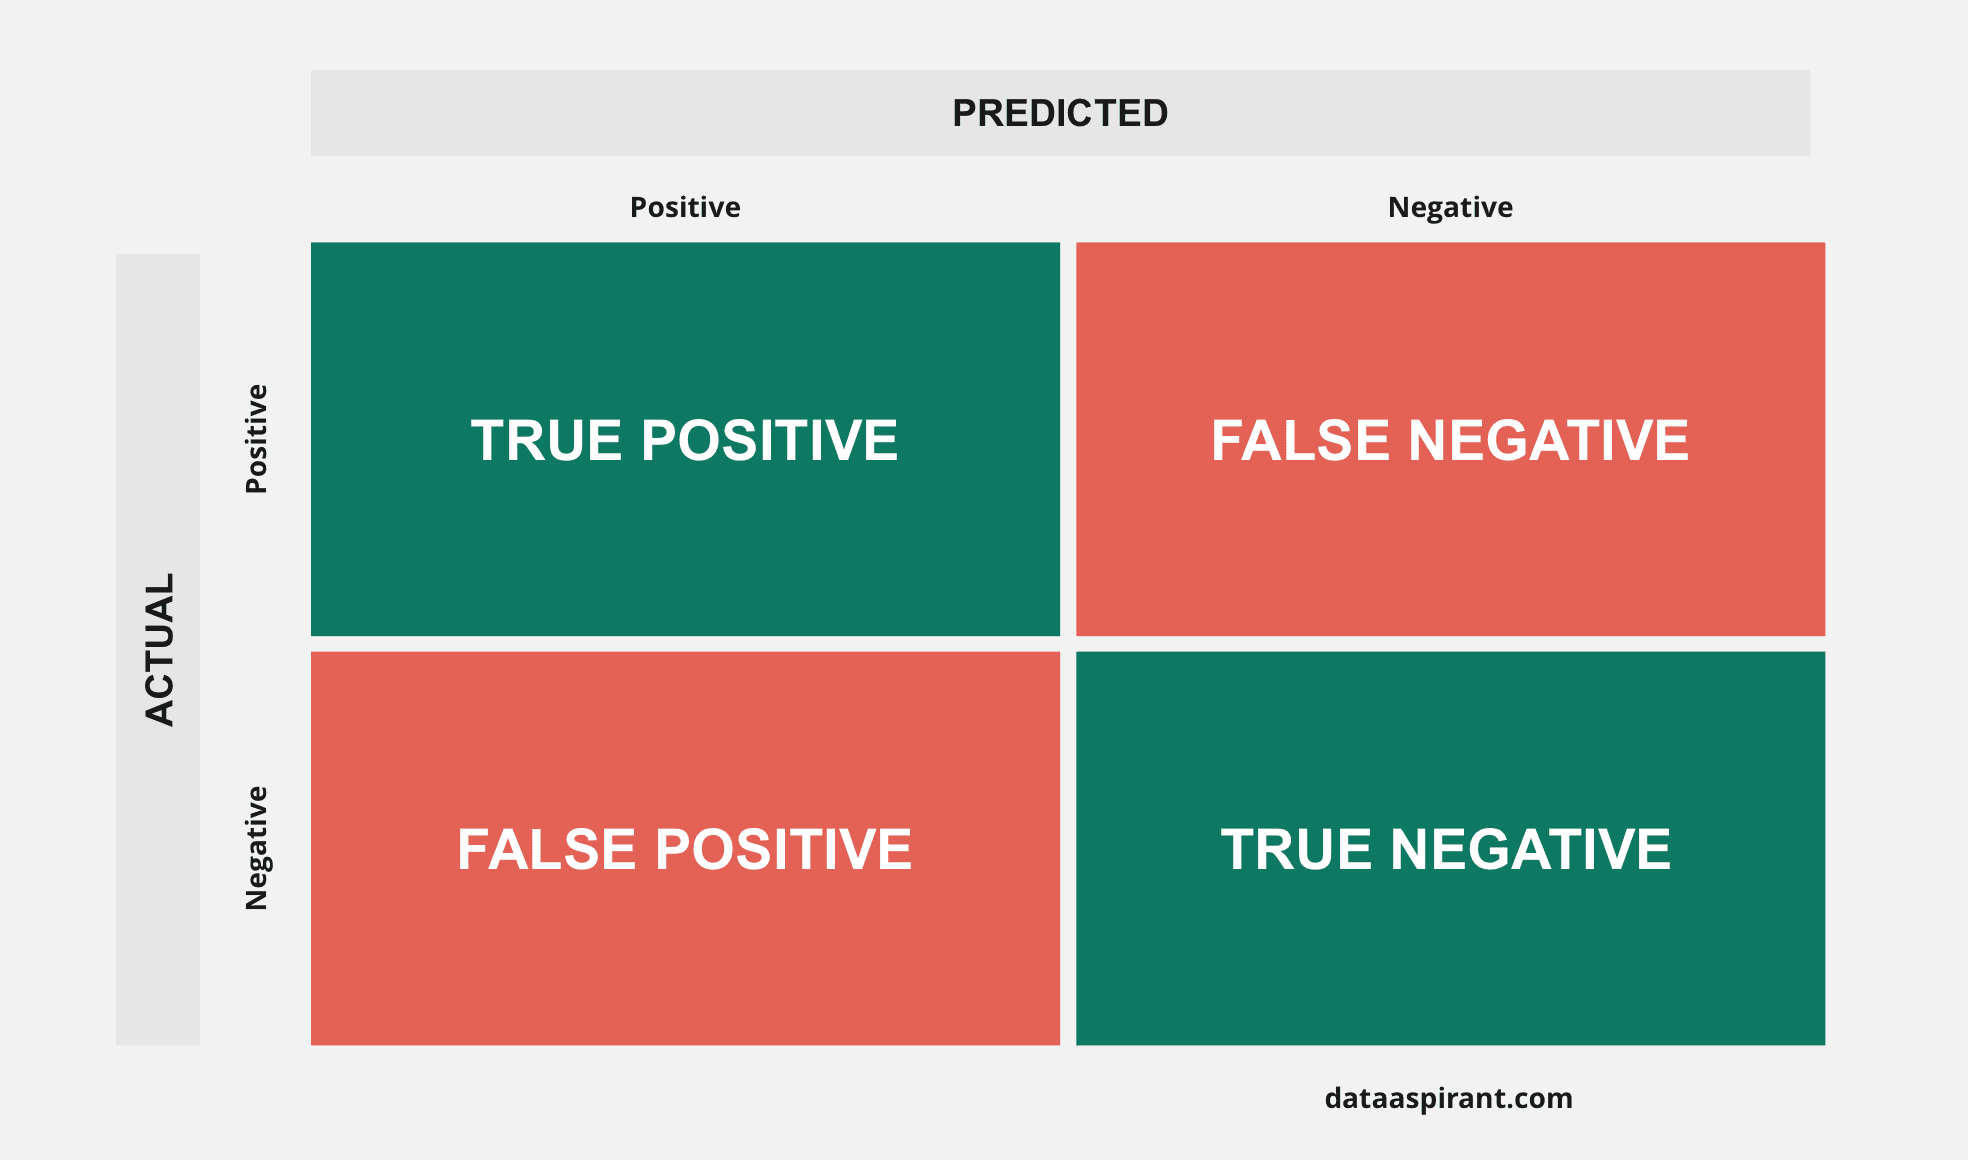

In [65]:
print('true negative',tn)
print("false positive",fp)
print("false negative",fn)
print("true positive",tp)

true negative 1095
false positive 116
false negative 73
true positive 73


<AxesSubplot:>

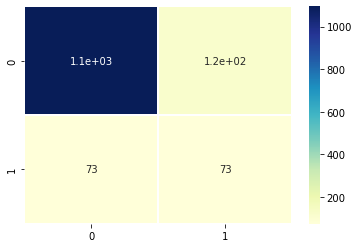

In [69]:
sns.heatmap(dt_conf,annot=True,linewidth=2,cmap="YlGnBu")
# 1.1e+03=1103

<AxesSubplot:>

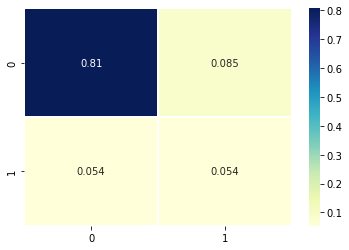

In [68]:
sns.heatmap(dt_conf/np.sum(dt_conf),annot=True,linewidth=2,cmap="YlGnBu")

In [72]:
precission=tp/(tp+fp)
precission

0.3862433862433862

In [73]:
dt_pre=precision_score(y_test,acc_score)
dt_pre

TypeError: Singleton array 86.0 cannot be considered a valid collection.

In [78]:
recall=tp/(tp+fn)
recall

0.5

In [77]:
dt_f1=f1_score(y_test,y_dt_pred)
dt_f1

0.435820895522388

In [93]:
dict1={"DT_accuracy":acc_score,
      "DT_precission":(precission),
      "DT_recall":(recall),
      "DT_f1_score":(dt_f1,)}
pd.DataFrame(dict1)

,DT_accuracy,DT_precission,DT_recall,DT_f1_score
0,86.0,0.386243,0.5,0.435821


In [ ]:
print(classification_report(y_test,y_dt_pred))
# support:number of actual occurence 
# total ibservation in that is 1357
# in that 0's as target is 1211
# in that 1's as target is 146

In [82]:
print(classification_report(y_test,y_pred))
# support:number of actual occurence 
# total observation in that is 1357
# in that 0's as target is 1211
# in that 1's as target is 146

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1211
           1       0.39      0.50      0.44       146

    accuracy                           0.86      1357
   macro avg       0.66      0.70      0.68      1357
weighted avg       0.88      0.86      0.87      1357



#### your task 
### what is macro avg and weight avg 

### ROC AUC 

- conider there are two classes are there 
- for every observation it will give probability 
- which ever will be the highest probablility is the output

In [95]:
probs=tree_model.predict_proba(x_test)
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [97]:
prob_data=pd.DataFrame(probs,columns=["class_0","class_1"])
prob_data

,class_0,class_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1352,0.0,1.0
1353,1.0,0.0
1354,1.0,0.0
1355,1.0,0.0


In [98]:
prob_data.head(10)

,class_0,class_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,0.0,1.0
9,1.0,0.0


In [101]:
y_dt_pred[:20] # these are classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

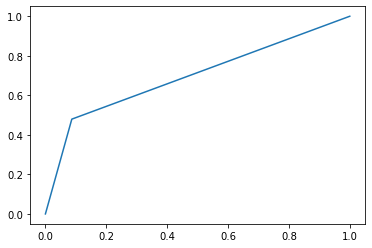

In [104]:
from sklearn.metrics import roc_curve
y_dt_pred_prob=tree_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

In [105]:
y_dt_pred_prob # class_1 values 

array([0., 0., 0., ..., 0., 0., 0.])

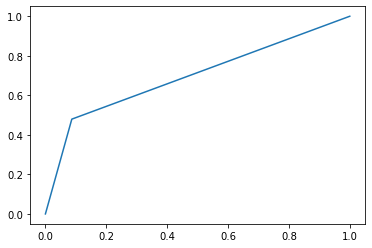

In [107]:
plt.plot(fpr,tpr)

In [148]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

dt_acc=accuracy_score(y_test,y_dt_pred)
dt_pr=precision_score(y_test,y_dt_pred)
dt_recall=recall_score(y_test,y_dt_pred)
dt_f1_score=f1_score(y_test,y_dt_pred)


# 2. NaviBayes

In [109]:
from sklearn.naive_bayes import GaussianNB

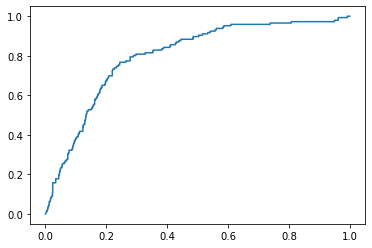

In [138]:
from sklearn.naive_bayes import GaussianNB
navi_model=GaussianNB()
navi_model.fit(X=x_train,y=y_train)
y_nb_pred=navi_model.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test,y_nb_pred).ravel()


navi_acc=accuracy_score(y_test,y_nb_pred)
navi_pr=precision_score(y_test,y_nb_pred)
navi_recall=recall_score(y_test,y_nb_pred)
navi_f1_score=f1_score(y_test,y_nb_pred)

dict1={"NB_accuracy":navi_acc,
      "NB_precission":(navi_pr),
      "NB_recall":(navi_recall),
      "NB_f1_score":(navi_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_nb_pred_prob=navi_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_nb_pred_prob)
plt.plot(fpr,tpr)





In [116]:
pd.DataFrame(dict1,index=[1])

,DT_accuracy,DT_precission,DT_recall,DT_f1_score
1,0.826087,0.302632,0.472603,0.368984


In [139]:
dt_list=[dt_acc,dt_pr,dt_recall,dt_f1_score]
nb_list=[navi_acc,navi_pr,navi_recall,navi_f1_score]
pd.DataFrame(zip(dt_list,nb_list),
             columns=['Decision_Tree','Naive_Bayes'],
             index=['Accuracy','Precison','Recall','F1score'])

,Decision_Tree,Naive_Bayes
Accuracy,0.826087,0.826087
Precison,0.302632,0.302632
Recall,0.472603,0.472603
F1score,0.368984,0.368984


# 3 logistics Regression

In [120]:
from sklearn.linear_model import LogisticRegression

C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


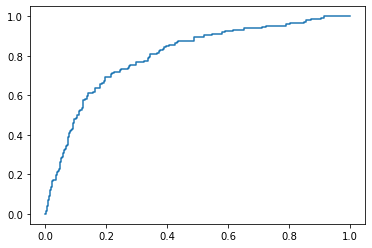

In [129]:
lr=LogisticRegression()
lr.fit(X=x_train,y=y_train)
y_lr_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test,y_lr_pred).ravel()


lr_acc=accuracy_score(y_test,y_lr_pred)
lr_pr=precision_score(y_test,y_lr_pred)
lr_recall=recall_score(y_test,y_lr_pred)
lr_f1_score=f1_score(y_test,y_lr_pred)

dict1={"lr_accuracy":lr_acc,
      "lr_precission":(lr_pr),
      "lr_recall":(lr_recall),
      "lr_f1_score":(lr_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_lr_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_lr_pred_prob)
plt.plot(fpr,tpr)


In [137]:
dt_list=[dt_acc,dt_pr,dt_recall,dt_f1_score]
nb_list=[navi_acc,navi_pr,navi_recall,navi_f1_score]
lr_list=[lr_acc,lr_pr,lr_recall,lr_f1_score]
pd.DataFrame(zip(dt_list,nb_list,lr_list),
             columns=['Decision_Tree','Naive_Bayes','LogisticsRegression'],
             index=['Accuracy','Precison','Recall','F1score'])

,Decision_Tree,Naive_Bayes,LogisticsRegression
Accuracy,0.826087,0.826087,0.885041
Precison,0.302632,0.302632,0.416667
Recall,0.472603,0.472603,0.171233
F1score,0.368984,0.368984,0.242718


# 4 KNN

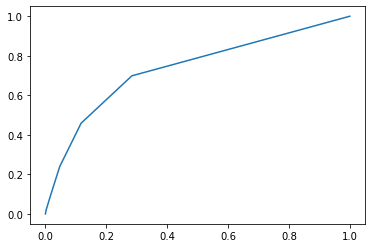

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X=x_train,y=y_train)
y_knn_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test,y_knn_pred).ravel()


knn_acc=accuracy_score(y_test,y_knn_pred)
knn_pr=precision_score(y_test,y_knn_pred)
knn_recall=recall_score(y_test,y_knn_pred)
knn_f1_score=f1_score(y_test,y_knn_pred)

dict1={"knn_accuracy":knn_acc,
      "knn_precission":(knn_pr),
      "knn_recall":(knn_recall),
      "knn_f1_score":(knn_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_knn_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_knn_pred_prob)
plt.plot(fpr,tpr)

In [144]:
dt_list=[dt_acc,dt_pr,dt_recall,dt_f1_score]
nb_list=[navi_acc,navi_pr,navi_recall,navi_f1_score]
lr_list=[lr_acc,lr_pr,lr_recall,lr_f1_score]
knn_list=[knn_acc,knn_pr,knn_recall,knn_f1_score]
pd.DataFrame(zip(dt_list,nb_list,lr_list,knn_list),
             columns=['Decision_Tree','Naive_Bayes','LogisticsRegression',"KNN"],
             index=['Accuracy','Precison','Recall','F1score'])

,Decision_Tree,Naive_Bayes,LogisticsRegression,KNN
Accuracy,0.826087,0.826087,0.885041,0.876197
Precison,0.302632,0.302632,0.416667,0.380435
Recall,0.472603,0.472603,0.171233,0.239726
F1score,0.368984,0.368984,0.242718,0.294118


# 4.Random Forest 

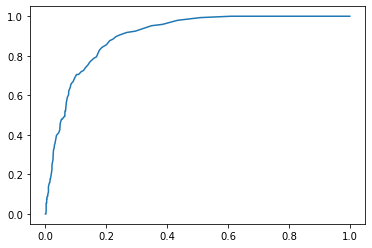

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X=x_train,y=y_train)
y_rf_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test,y_rf_pred).ravel()


rf_acc=accuracy_score(y_test,y_rf_pred)
rf_pr=precision_score(y_test,y_rf_pred)
rf_recall=recall_score(y_test,y_rf_pred)
rf_f1_score=f1_score(y_test,y_rf_pred)

dict1={"rf_accuracy":rf_acc,
      "rf_precission":(rf_pr),
      "rf_recall":(rf_recall),
      "rf_f1_score":(rf_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_rf_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_rf_pred_prob)
plt.plot(fpr,tpr)    

In [146]:
dict1

{'rf_accuracy': 0.9034635224760501,
 'rf_precission': 0.5949367088607594,
 'rf_recall': 0.3219178082191781,
 'rf_f1_score': 0.41777777777777775}

In [149]:
dt_list=[dt_acc,dt_pr,dt_recall,dt_f1_score]
nb_list=[navi_acc,navi_pr,navi_recall,navi_f1_score]
lr_list=[lr_acc,lr_pr,lr_recall,lr_f1_score]
knn_list=[knn_acc,knn_pr,knn_recall,knn_f1_score]
rf_list=[rf_acc,rf_pr,rf_recall,rf_f1_score]
pd.DataFrame(zip(dt_list,nb_list,lr_list,knn_list,rf_list),
             columns=['Decision_Tree','Naive_Bayes','LogisticsRegression',"KNN","RF"],
             index=['Accuracy','Precison','Recall','F1score'])

,Decision_Tree,Naive_Bayes,LogisticsRegression,KNN,RF
Accuracy,0.826087,0.826087,0.885041,0.876197,0.903464
Precison,0.302632,0.302632,0.416667,0.380435,0.594937
Recall,0.472603,0.472603,0.171233,0.239726,0.321918
F1score,0.368984,0.368984,0.242718,0.294118,0.417778


In [154]:
print("-"*10,".|.","-"*10,sep="")

----------.|.----------


In [184]:
N,M=map(int,input().split())
m=int((M-3)/2)
n=1
for i in range(N):
    print("-"*m,".|."*n,"-"*m,sep="")
    m=m-3
    n=n+2
    if m<3:
        break 

print("WELCOME".center(M,"-"))   
m=3
n=int((M-m*2)/3)
for i in range(N):
    print("-"*m,".|."*n,"-"*m,sep="")
    m=m+3
    n=n-2
    if n<1:
        break

7 21
---------.|.---------
------.|..|..|.------
---.|..|..|..|..|.---
-------WELCOME-------
---.|..|..|..|..|.---
------.|..|..|.------
---------.|.---------


In [192]:
a="bddcsd"
a.index("c")

3

In [210]:
def breakingRecords(scores):
    zero=0
    one=0
    max1=scores[0]
    min1=scores[0]
    for i in scores:
        if i>max1:
            max1=scores[scores.index(i)]
            one=one+1
    for i in scores:
        if i<min1:
            min1=scores[scores.index(i)]
            zero=zero+1     
    return one,zero 

breakingRecords([10,5,20,20,4,5,2,25,1])

(2, 4)

In [214]:
print("abcd".rjust(20))

                abcd
